The risk is that everyone flies in airplanes nowadays which can make it dangerous if our pilots are not fully attentive or distracted during flight time. We were tasked to figure out how we can alert pilots of such drowsy or sleepy behavior.

In [1]:
### libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, SCORERS
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [2]:
### reading in csv file and placing it into a dataframe
df = pd.read_csv("train.csv")

In [43]:
### printing out the fist five rows of the data frame that we just created
df.head(10)

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,...,37.368999,17.437599,19.201900,20.596800,-3.951150,14.507600,-4520.0,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,...,31.170799,19.399700,19.689501,21.354700,1.332120,17.750200,-4520.0,817.705994,388.829987,A
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,...,-12.012600,19.396299,23.171700,22.407600,1.537860,22.247000,-4520.0,817.705994,388.829987,A
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,...,18.574100,23.156401,22.641199,19.336700,2.544920,18.998600,-4520.0,817.705994,388.829987,A
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,...,6.555440,22.754700,22.670300,20.293200,1.699620,22.812799,-4520.0,817.705994,388.829987,A
5,1,CA,0.031250,1,6.06746,23.128300,8.645660,14.380800,16.055500,26.925200,...,-9.289120,21.440599,23.253700,19.069599,-0.765018,26.451900,-4520.0,817.705994,388.829987,A
6,1,CA,0.035156,1,-1.37602,20.972000,3.754160,13.766700,18.122000,29.391199,...,-0.604736,20.993401,21.556200,17.327299,1.465000,21.289301,-4520.0,817.705994,388.829987,A
7,1,CA,0.039062,1,1.54787,18.398100,-9.113150,-1.033160,22.627001,32.816601,...,17.483601,22.912600,23.187000,18.462700,0.299232,23.691500,-4520.0,817.705994,388.829987,A
8,1,CA,0.042969,1,-7.78946,12.210700,-8.953760,1.091740,28.526501,35.267200,...,16.681101,28.779600,28.382099,20.697300,-6.620750,31.672701,-4520.0,817.705994,388.829987,A
9,1,CA,0.046875,1,-11.17750,18.235901,-1.035220,4.751110,25.983801,30.499100,...,0.489098,21.937500,21.629299,19.525999,-5.186040,21.618700,-4520.0,817.705994,388.829987,A


In [5]:
### printing out the shape of our dataframe
df.shape

(4867421, 28)

In [50]:
### placing the column names into a variable
column_names = df.columns
# df[column_names[10]].plot(title=column_names[10])
df["seat"] = df["seat"].astype("bool")

In [51]:
### printing out the types of each column
df.dtypes

crew            int64
experiment     object
time          float64
seat             bool
eeg_fp1       float64
eeg_f7        float64
eeg_f8        float64
eeg_t4        float64
eeg_t6        float64
eeg_t5        float64
eeg_t3        float64
eeg_fp2       float64
eeg_o1        float64
eeg_p3        float64
eeg_pz        float64
eeg_f3        float64
eeg_fz        float64
eeg_f4        float64
eeg_c4        float64
eeg_p4        float64
eeg_poz       float64
eeg_c3        float64
eeg_cz        float64
eeg_o2        float64
ecg           float64
r             float64
gsr           float64
event          object
dtype: object

Text(0, 0.5, 'Frequency')

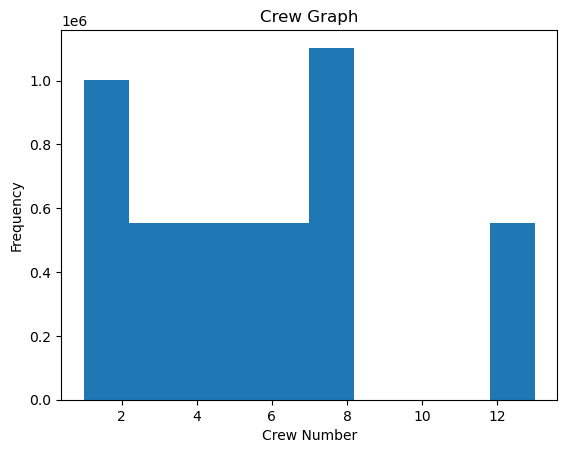

In [8]:
### creating a historgram of the Crew column
# g = df["crew"].hist(bins=9)
# df["crew"].unique()
# df.loc[df["crew"].isna() == True]
plt.hist(df["crew"])
plt.title("Crew Graph")
plt.xlabel("Crew Number")
plt.ylabel("Frequency")

<Axes: >

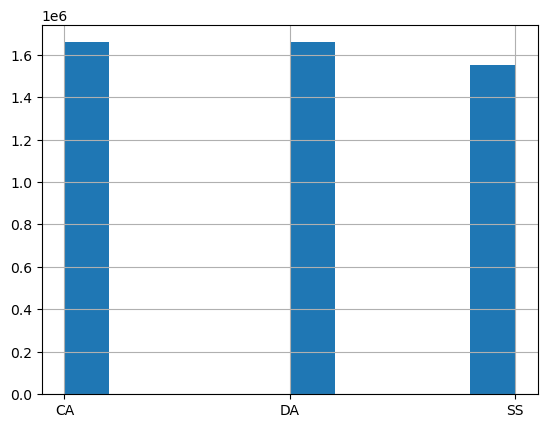

In [9]:
### creating a histogram of the target column aka the experiment column
df["experiment"].hist()
# df.loc[df["experiment"].isnull() == True]

<Axes: xlabel='rows', ylabel='time'>

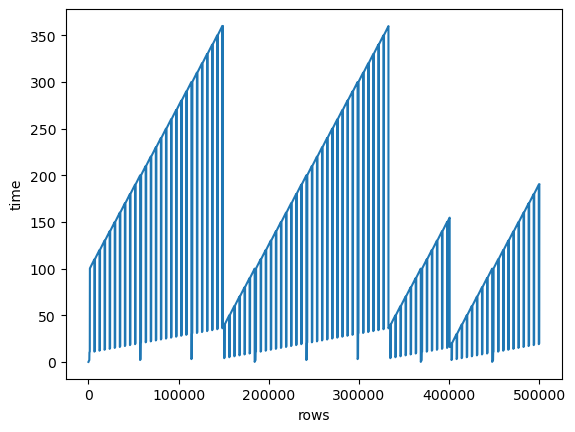

In [20]:
### plotting the time column
# df["time"].hist()
df["time"][1:500000].plot(xlabel="rows", ylabel="time")
# df["time"].unique()

<Axes: >

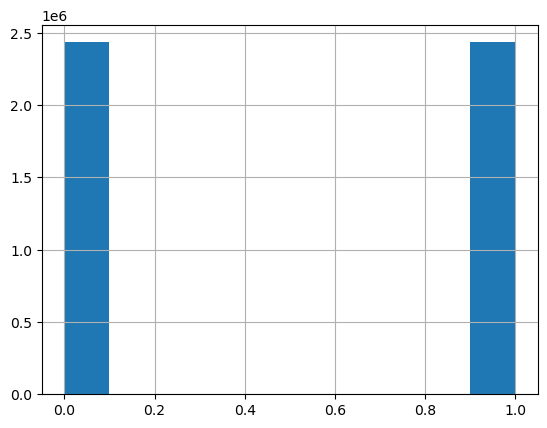

In [11]:
### creating a histogram of the seat column 
df["seat"].unique()
df["seat"].hist()

Text(0.5, 1.0, 'eeg_fp1 Graph')

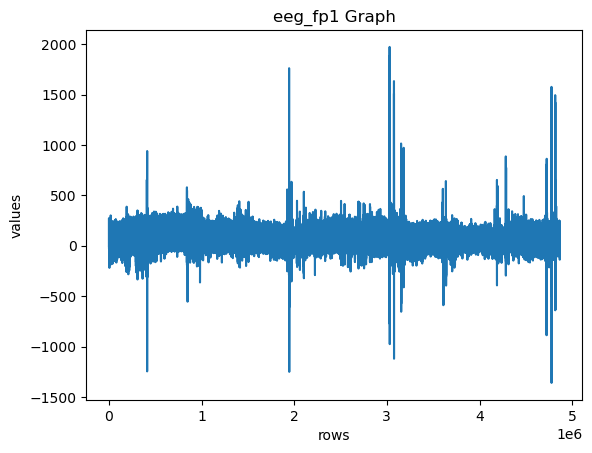

In [93]:
### ploting the fp1 column
# g = df["eeg_fp1"].plot()
plt.plot(df["eeg_fp1"])
# plt.legend()
plt.xlabel("rows")
plt.ylabel("values")
plt.title("eeg_fp1 Graph")

<Axes: >

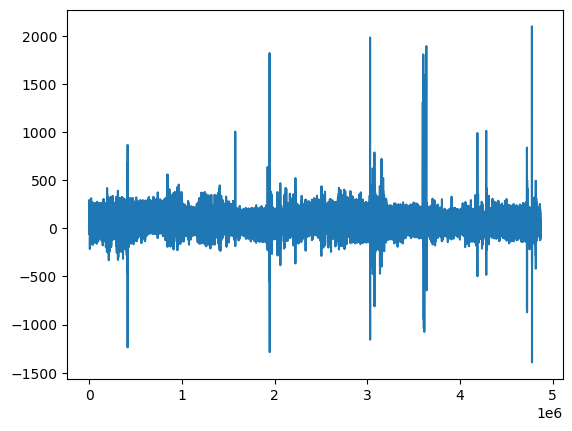

In [30]:
### plotting fp2
df["eeg_fp2"].plot()

<Axes: >

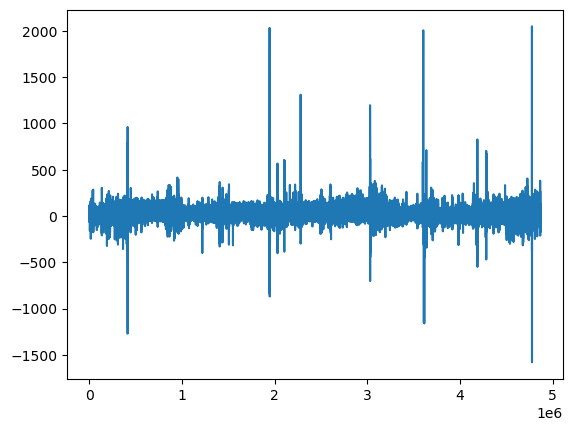

In [41]:
### plotting f7
# df.loc[df["eeg_f7"].isna()==True]
# len(df["eeg_f7"].unique())
df["eeg_f7"].plot()

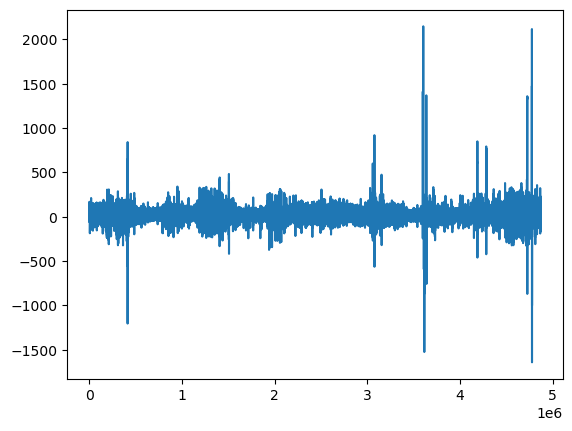

In [12]:
### plotting f8
plt.plot(df["eeg_f8"])

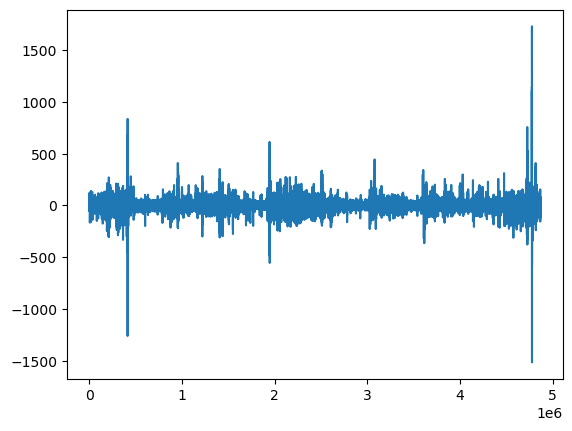

In [14]:
### plotting t4
plt.plot(df["eeg_t4"])

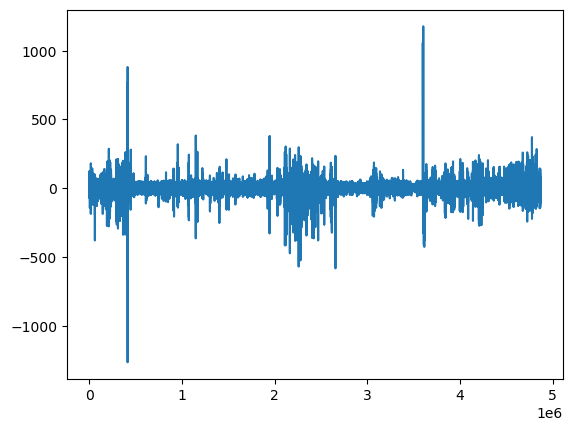

In [52]:
### possibly printing out column names and plotting t5
column_names
# plt.plot(df["eeg_t6"])
plt.plot(df["eeg_t5"])


Text(0.5, 1.0, 'eeg_fp1 vs time')

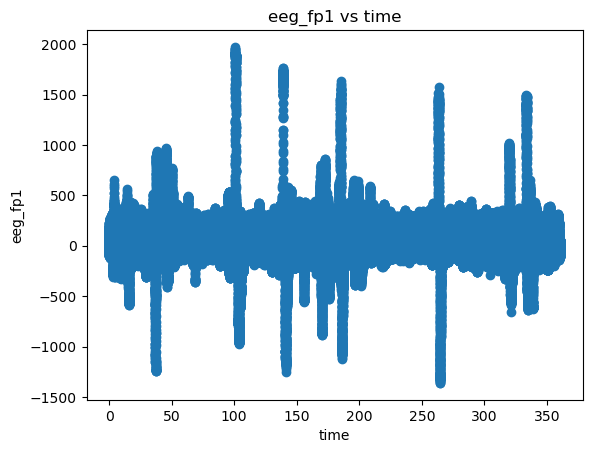

In [18]:
### plotting time vs fp1
plt.scatter(df['time'], df['eeg_fp1'])
plt.xlabel("time")
plt.ylabel("eeg_fp1")
plt.title("eeg_fp1 vs time")

In [16]:
### checking for 0 values in the dataframe and there are a lot, what does that mean?
df.loc[df["eeg_fp1"] == 0]

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
36,1,CA,0.152344,1,0.0,22.184700,0.111374,8.494920,12.991300,22.642599,...,15.701800,14.709800,12.678200,14.447000,10.85240,15.675700,-4520.000000,817.705994,388.829987,A
52,1,CA,0.199219,0,0.0,-0.260347,5.007830,10.015900,-1.802200,-7.049790,...,-1.161440,-1.529110,-7.383270,-0.912276,3.56484,-9.385510,-18260.800780,665.002014,823.356018,A
53,1,CA,0.199219,1,0.0,20.566000,-5.065160,6.118420,18.780701,23.040199,...,15.560600,21.701700,20.516800,17.092600,21.44940,20.340900,-4511.839844,817.687012,388.612000,A
581,1,CA,1.230469,1,0.0,4.559800,-3.682390,13.541600,33.072498,41.039600,...,18.823000,22.248199,22.690001,13.416700,19.55530,40.707500,-4447.339844,817.411011,384.744995,A
867,1,CA,1.789062,1,0.0,-9.098300,2.944960,11.234000,0.204641,-9.949230,...,-0.884221,1.452980,-2.688510,-6.150930,-76.18280,6.472630,-4418.729980,817.627991,384.877014,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4864281,13,SS,93.883003,0,0.0,-7.025490,-15.967600,-8.296620,7.662790,1.446540,...,20.701300,14.450100,14.471500,0.904007,11.12310,20.819799,-13691.400391,667.562012,547.919983,B
4865497,13,SS,96.277008,1,0.0,-49.076599,1.400870,-13.697000,36.296200,12.736100,...,6.933350,20.332199,16.555099,-10.424500,8.65020,12.235000,-8518.700195,782.656982,759.080994,B
4865857,13,SS,96.944008,1,0.0,203.033997,-18.034000,-64.009300,-55.088402,-65.703003,...,10.112800,16.328501,45.369701,-125.779999,1.54629,5.637940,-8381.230469,776.377991,731.145996,B
4866583,13,SS,98.374008,0,0.0,1.403890,40.671700,115.160004,43.365601,8.397570,...,9.402900,20.033100,12.887400,-7.214070,9.44225,18.185801,-13668.099609,667.705017,541.879028,B


In [17]:
### checking for 0's in f7
df.loc[df["eeg_f7"] == 0]

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
50,1,CA,0.195312,0,3.100600,0.0,8.118780,10.09110,4.783260,-14.553400,...,-5.505160,-4.917930,-10.377900,-0.696449,2.998400,-11.997400,-18260.800780,665.002014,823.356018,A
60,1,CA,0.214844,0,-3.170320,0.0,0.808147,3.65266,1.174990,-1.838420,...,7.191010,1.659600,-7.493740,-2.286660,1.699460,-5.134870,-18261.699220,665.091003,823.414978,A
448,1,CA,0.972656,0,5.182850,0.0,0.806099,-7.79653,4.993660,0.245706,...,-8.182560,-3.723430,-4.293240,-2.863590,-9.897460,4.177020,-18201.699220,666.164001,824.231995,A
534,1,CA,1.140625,0,1.856390,0.0,1.985320,1.49765,-5.415890,-3.726620,...,-13.662400,-3.376480,2.532650,5.302790,-0.995763,5.843320,-18226.500000,666.231995,824.383972,A
1044,1,CA,10.136719,0,2.743020,0.0,-8.342170,-7.26845,-0.355132,-0.759173,...,-7.627960,-2.992100,3.294130,-4.747730,-9.390480,4.828990,-18286.000000,666.184021,834.737976,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4864882,13,SS,95.049004,0,8.772190,0.0,-3.915010,-1.93460,45.291000,12.811000,...,120.665001,51.585800,31.379000,24.612499,29.375999,31.835199,-13627.799805,667.135010,542.922974,B
4865171,13,SS,95.625008,1,47.443501,0.0,-6.880550,-15.05250,74.120003,8.619330,...,-2.796980,-34.031399,-35.197201,-18.883900,-9.279780,-12.072900,-8808.650391,791.080994,799.802002,B
4866280,13,SS,97.806007,0,-57.420898,0.0,-71.304100,-30.09560,-1.286380,-24.230101,...,-70.597000,-25.167200,-17.213301,-11.750900,-35.220001,-16.373199,-13644.000000,666.700012,540.929016,B
4866422,13,SS,98.076004,0,-79.957901,0.0,-7.809270,-10.79360,-27.986200,-8.365670,...,-29.344900,-35.005100,-26.598499,-11.919100,-44.707901,-23.153500,-13656.799805,667.098022,541.349976,B


Steps:
- make graphs (EDA)
- check zeroes?
- normalize
- concat, sample, and then split
- split the data into training and test set
- create models

In [ ]:
### wanted to create a pairplot but took way too much time so did not end up doing it.
# sns.pairplot(df)

In [3]:
### getting dummies for the column event.
# y_df = pd.get_dummies(df["experiment"])
event_df = pd.get_dummies(df["event"])

In [7]:
### skratch work
# y = df["experiment"]
# df = df.drop(['event'], axis=1)
# df = df.drop(columns = ["experiment", "event"], axis=1)
# df = pd.concat([df, event_df], axis=1)
# df.head()

In [8]:
### trying to concatenate the df and the target values to then sample accordingly.
# df = pd.concat([df, y_df], axis=1)

### sample to use a smaller portion of data points in our model
from sklearn.preprocessing import normalize
sample1 = df.sample(frac=0.001, random_state=42)
sample1

### set y dummies but you should not do that, just rename experiment values to numeric values such as 1-3 for categorical data.
sample1_y = pd.get_dummies(sample1["experiment"])
### one-hot encoding for the column event
sample1_event = pd.get_dummies(sample1["event"])
### dropping experiment and event columns, so removing the columns from the dataframe
sample1 = sample1.drop(['experiment', 'event'], axis=1)
### adding back in the columns that we encoded up above back into the dataframe.
sample1 = pd.concat([sample1, sample1_event], axis=1)
### normalizing to make sure that the values make sense and there is no outliers that skew the data too much.
sample1 = normalize(sample1)

### split the data into training and test set.
X_train, X_test, y_train, y_test = train_test_split(sample1, sample1_y["CA"], test_size = 0.2, random_state=42)

In [9]:
### making sure that our train_test_split function worked well by printing out some of the variables.
# X_train

In [10]:
### creating a LinearRegression model
# This is our first model and most simple model but since we are working with categorical data, we cannot use regression, 
#  so basically this is a bad idea.
model = LinearRegression()

In [11]:
### fitting the linear model
model.fit(X_train, y_train)

LinearRegression()

In [12]:
### using X_test to predict our model
y_pred = model.predict(X_test)
y_pred
# model.intercept_
# model.coef_


# calculate accuracy
# accuracy_score(y_test,y_pred)
r2_score(y_test,y_pred)

0.510073048924947

In [30]:
### creating a second model, logistical regression
model2 = LogisticRegression()

In [31]:
### fitting our second model to the data
model2.fit(X_train,y_train)

LogisticRegression()

In [36]:
### using X_test to get a prediction out of this second model.
y_pred = model2.predict(X_test)
y_pred

### finding the accuracy score
accuracy_score(y_test, y_pred)
r2_score(y_test, y_pred)

-0.5387045813586102

In [37]:
### creating a third model, RandomForestRegressor
model3 = RandomForestRegressor()

In [38]:
### fitting the training data to the third model
model3.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
### getting a predition of our third model
y_pred = model3.predict(X_test)
y_pred = np.round(y_pred)
y_pred

#accuracy_score(y_test,y_pred)

array([0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.

We should not be using Regressors because we are working with categories as output.
Instead, we need to use classifiers.

In [58]:
### creating a fourth model, this one is a good one because it is a classifier and it will be better for categorical data
model4 = RandomForestClassifier()

### taking a sample from the original dataframe
sample2 = df.sample(frac=0.001, random_state=42)

### printing out the sampled data
sample2

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
4420131,13,CA,283.885010,False,-11.291000,-11.479000,-15.766000,-1.32666,6.90779,-11.305400,...,4.108120,2.793920,-5.601350,-3.967870,-2.948360,-5.064130,-16546.900391,677.336975,553.388000,C
3750119,7,SS,73.479004,False,0.307862,9.567890,2.505840,6.01694,3.83542,6.739190,...,10.238400,6.992280,-3.691310,5.997960,6.873480,-0.496282,7670.859863,732.747986,1422.390015,A
2795667,6,CA,338.980469,True,-3.439860,-4.273920,-14.048200,-9.61291,-12.63800,-1.167820,...,-0.436768,-3.095720,8.875840,5.684930,8.427330,4.798030,10506.299805,795.781982,1697.329956,C
1867314,4,DA,326.257812,False,21.420099,15.539400,-0.604774,-6.50413,-3.16223,-0.819487,...,-0.574353,-3.829190,-3.613800,5.334050,9.900310,1.267600,-746.991028,598.934998,927.851990,A
1034833,3,CA,159.074219,True,53.655701,18.531300,21.784901,1.82460,-4.38305,8.340510,...,-0.478073,-4.341080,-10.729500,11.065300,2.396640,-10.652700,8656.940430,799.846008,439.843994,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849636,4,DA,295.730469,False,14.122400,15.303200,-5.799780,10.17700,10.79270,12.089700,...,12.688100,11.521600,7.445140,18.359699,14.467900,6.085300,-976.494995,598.539978,915.482971,A
3035151,6,SS,110.671875,False,-12.679200,-11.106500,0.043394,-7.17251,2.63884,-3.524780,...,-1.409420,0.478319,0.301217,-3.322530,-0.097792,4.377130,27350.000000,655.132019,839.919983,A
2949789,6,DA,286.089844,True,293.348999,231.192001,94.421799,25.64390,8.95747,30.726900,...,57.303600,39.918598,49.947201,93.094704,82.961700,23.657000,12028.500000,793.830994,1754.630005,A
4356940,13,CA,172.543015,True,12.547400,16.913700,9.791590,7.78767,1.18204,0.982751,...,9.337510,4.319190,5.500860,0.469433,17.189400,1.362930,-8050.169922,799.476990,804.825012,C


In [59]:
### converting the target column of the sampled data into numerical data.
y = sample2["experiment"]
y_new = []
for i in y:
    if(i == 'CA'):
        y_new.append(1)
    elif(i == 'DA'):
        y_new.append(2)
    else:
        y_new.append(3)
# y_new

In [60]:
### dropping the target column and the event column
sample2 = sample2.drop(["experiment"], axis=1)
sample2 = sample2.drop(["event"], axis=1)

### splitting the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(sample2,y_new,test_size=0.2, random_state=15)

In [61]:
### checking if our training set and test set are what they should look like
# X_train

In [62]:
### fitting the classifier model to our training data
model4.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
### getting a prediction of our data from the test set
y_pred = model4.predict(X_test)

### finding the accuracy of the data.
accuracy_score(y_test,y_pred)

0.9548254620123203

In [84]:
### confusion matrix on the tested data
confusion_matrix(y_test,y_pred)

array([[290,   5,  21],
       [  4, 325,   3],
       [ 18,   1, 307]], dtype=int64)

Cool website to get familiar with confusion matrices if you don't know much about them and do more research if this one does not help you much

https://www.v7labs.com/blog/confusion-matrix-guide#:~:text=A%20confusion%20matrix%2C%20as%20the%20name%20suggests%2C%20is,the%20original%20classes%20to%20which%20the%20data%20belong.


In [64]:
### Bootstrap
# This takes roughly 8minuets to run 20 times
bs = 0
for i in range(20):
    sample = df.sample(frac=0.001)
    y = sample["experiment"]
    y_new = []
    for i in y:
        if(i == 'CA'):
            y_new.append(1)
        elif(i == 'DA'):
            y_new.append(2)
        else:
            y_new.append(3)
            
    sample = sample.drop(["experiment"], axis=1)
    sample = sample.drop(["event"], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(sample,y_new,test_size=0.2, random_state=15)
    
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    bs += accuracy_score(y_test,model.predict(X_test))

bs/20

0.9445071868583164

In [65]:
### Gradient Booster Bootstrap
bs = 0
for i in range(20):
    sample5 = df.sample(frac=0.001)
    # len(sample5)
    y = sample5["experiment"]
    y_new = []
    for i in y:
        if(i == 'CA'):
            y_new.append(1)
        elif(i == 'DA'):
            y_new.append(2)
        else:
            y_new.append(3)

    sample5 = sample5.drop(["experiment"], axis=1)
    sample5 = sample5.drop(["event"], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(sample5,y_new,test_size=0.2, random_state=15)

    model5 = GradientBoostingClassifier()
    model5.fit(X_train,y_train)
    bs += accuracy_score(y_test, model.predict(X_test))
    
bs/20

0.949435318275154

In [ ]:
### Gradient Boosting testing
sample5 = df.sample(frac=0.01)
# len(sample5)
y = sample5["experiment"]
y_new = []
for i in y:
    if(i == 'CA'):
        y_new.append(1)
    elif(i == 'DA'):
        y_new.append(2)
    else:
        y_new.append(3)

sample5 = sample5.drop(["experiment"], axis=1)
sample5 = sample5.drop(["event"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(sample5,y_new,test_size=0.2, random_state=15)

model5 = GradientBoostingClassifier()
model5.fit(X_train,y_train)
accuracy_score(y_test, model5.predict(X_test))

One run through gave 93%
Second run through gave 95%


In [92]:
### Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

sample6 = df.sample(frac=0.01)
# sample6
y = sample6["experiment"]
y_new = []
for i in y:
    if(i == 'CA'):
        y_new.append(1)
    elif(i == 'DA'):
        y_new.append(2)
    else:
        y_new.append(3)
        
sample6 = sample6.drop(["experiment"], axis=1)
sample6 = sample6.drop(["event"], axis=1)

X_train, X_test,y_train,y_test = train_test_split(sample6, y_new, test_size=0.2, random_state = 15)

model6 = DecisionTreeClassifier()
model6.fit(X_train, y_train)
y_pred = model6.predict(X_test)
accuracy_score(y_test,y_pred)

0.988597842835131

I was able to get an accuracy of 98.8% which has proven to be the best model so far.

In [103]:
### Decision Tee Classifier without time
sample7 = df.sample(frac=0.001)
# sample6
y = sample7["experiment"]
y_new = []
for i in y:
    if(i == 'CA'):
        y_new.append(1)
    elif(i == 'DA'):
        y_new.append(2)
    else:
        y_new.append(3)
        
sample7 = sample7.drop(["experiment"], axis=1)
sample7 = sample7.drop(["event"], axis=1)
sample7 = sample7.drop(["time"], axis=1)

X_train, X_test,y_train,y_test = train_test_split(sample7, y_new, test_size=0.2, random_state = 15)

model7 = DecisionTreeClassifier()
model7.fit(X_train, y_train)
y_pred = model7.predict(X_test)
accuracy_score(y_test,y_pred)

0.9425051334702259

I was able to get an accuracy between 92 and 96 but not higher. So it isn't a bad model but it is less accuracte than the one with time.